# Libraries.

In [1]:
import pandas as pd
import numpy as np

import tensorflow as tf
import keras
from keras import Sequential
from keras.layers import Activation, BatchNormalization, Conv2D, Dense, Dropout, Flatten, Input, MaxPooling2D
from keras.utils.np_utils import to_categorical
from keras.callbacks import ReduceLROnPlateau

from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

train = pd.read_csv('/content/drive/MyDrive/Kaggle Competitions/Digit Recognizer/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Kaggle Competitions/Digit Recognizer/test.csv')

# Data Preparation

In [2]:
from sklearn.model_selection import train_test_split
X = train.drop(['label'], axis = 1)
Y = to_categorical(train['label'])

# Train/Test split.
train_X, test_X, train_y, test_y = train_test_split(X, Y, stratify = Y, test_size = 0.1)

# Train/Val split.
train_X, val_X, train_y, val_y = train_test_split(train_X, train_y, test_size = 0.1)
print(train_X.shape, train_y.shape, val_X.shape, val_y.shape, test_X.shape, test_y.shape)


train_X = train_X.values.reshape(-1, 28, 28, 1)/255
val_X = val_X.values.reshape(-1, 28, 28, 1)/255
test_X = test_X.values.reshape(-1, 28, 28, 1)/255
reshaped_test = test.values.reshape(-1, 28, 28, 1)/255

(34020, 784) (34020, 10) (3780, 784) (3780, 10) (4200, 784) (4200, 10)


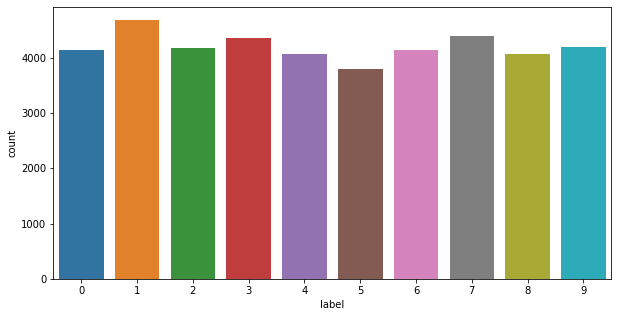

In [3]:
import seaborn as sns
plt.rcParams['figure.figsize'] = (10, 5)
sns.countplot(x = train['label'])

# Keras CNN.

In [4]:
model = Sequential()

# First Convolution Layer.
model.add(Conv2D(filters = 512, kernel_size = (3, 3), padding = 'same', input_shape = (28, 28, 1)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

# Second Convolution Layer.
model.add(Conv2D(filters = 32, kernel_size = (3, 3), padding = 'same', input_shape = (28, 28, 1)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

# Third Convolution Layer.
model.add(Conv2D(filters = 64, kernel_size = (3, 3), padding = 'same', input_shape = (28, 28, 1)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

# Reduces the 3D feature maps down to a 1D vector.
model.add(Flatten())

# Output
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.15))
model.add(Dense(10, activation = 'softmax'))

model.compile(optimizer = keras.optimizers.RMSprop(learning_rate = 5e-3),
               loss = 'categorical_crossentropy',
               metrics = ['accuracy'])

In [6]:
lr_reduction = ReduceLROnPlateau(monitor = 'val_accuracy',
                                 patience = 3,
                                 factor = 0.5,
                                 min_lr = 1e-5)

history = model.fit(train_X, train_y, validation_data=[val_X, val_y],
                    epochs = 30,
                    batch_size = 64,
                    callbacks = [lr_reduction])

Epoch 1/30
532/532 [==============================] - 16s 22ms/step - loss: 0.3731 - accuracy: 0.9126 - val_loss: 0.0806 - val_accuracy: 0.9772 - lr: 0.0050
Epoch 2/30
532/532 [==============================] - 11s 21ms/step - loss: 0.1292 - accuracy: 0.9659 - val_loss: 0.1144 - val_accuracy: 0.9677 - lr: 0.0050
Epoch 3/30
532/532 [==============================] - 11s 21ms/step - loss: 0.1009 - accuracy: 0.9749 - val_loss: 0.0638 - val_accuracy: 0.9828 - lr: 0.0050
Epoch 4/30
532/532 [==============================] - 11s 21ms/step - loss: 0.0791 - accuracy: 0.9788 - val_loss: 0.0492 - val_accuracy: 0.9860 - lr: 0.0050
Epoch 5/30
532/532 [==============================] - 11s 21ms/step - loss: 0.0708 - accuracy: 0.9797 - val_loss: 0.0493 - val_accuracy: 0.9868 - lr: 0.0050
Epoch 6/30
532/532 [==============================] - 11s 21ms/step - loss: 0.0620 - accuracy: 0.9823 - val_loss: 0.0457 - val_accuracy: 0.9886 - lr: 0.0050
Epoch 7/30
532/532 [==============================] - 11s 

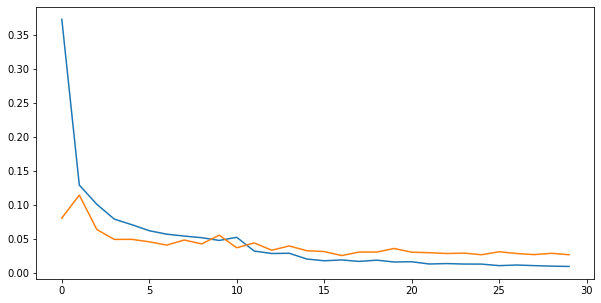

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

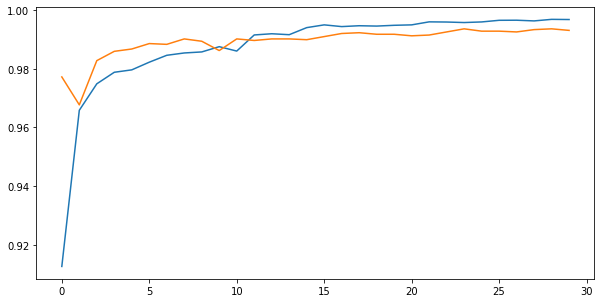

In [13]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [9]:
test_pred = model.predict(test_X)
classes = np.argmax(test_pred, axis = 1)
accuracy_score(y_true = np.argmax(test_y, axis = 1), y_pred = classes)

132/132 [==============================] - 1s 4ms/step


0.9923809523809524

In [10]:
preds = model.predict(val_X)
preds = np.argmax(preds,axis = 1)

119/119 [==============================] - 0s 4ms/step


0


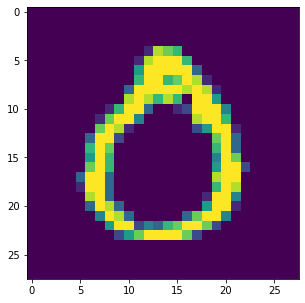

In [11]:
ind = np.random.randint(0,len(val_X))
print(preds[ind])
plt.imshow(val_X[ind].squeeze())

# Predictions.

In [14]:
pred = model.predict(reshaped_test)
classes = np.argmax(pred, axis = 1)

875/875 [==============================] - 3s 4ms/step


In [15]:
classes

array([2, 0, 9, ..., 3, 9, 2])

In [16]:
submission = pd.read_csv('/content/drive/MyDrive/Kaggle Competitions/Digit Recognizer/sample_submission.csv')

In [17]:
submission['Label'] = classes
submission.to_csv('/content/drive/MyDrive/Kaggle Competitions/Digit Recognizer/Submission.csv', index = False)